# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test 1: Solving and simulating the household problem](#toc2_)    
- 3. [Test 2: Evaluating the objective for finding the steady state](#toc3_)    
- 4. [Find stationary equilibrium](#toc4_)    
- 5. [Grid search](#toc5_)    
- 6. [Policy functions](#toc6_)    
- 7. [Simulation](#toc7_)    
- 8. [Test transition path](#toc8_)    
- 9. [Find transition path](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [697]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [811]:
model = HANCWelfareModelClass(name='baseline')
par = model.par
ss = model.ss

ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.tau = 0.1
ss.S = 0.1
ss.chi = 0.1
par.G_ss = 0.01
par.L_G_ss = 0.01
par.chi_ss = 0.01

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

# for KL in [2.0,3.0,4.0]:
#     clearing_A = obj_ss(KL,model,do_print=False)
#     print(f'{KL = :.2f} -> {clearing_A = :12.8f}')

model.find_ss(do_print=True)

household problem in ss solved in 0.5 secs [345 iterations]
household problem in ss simulated in 1.4 secs [399 iterations]
seaching in [2.9308,4.7940]
steady state found in 12.2 secs
ss.tau =  0.032
ss.K =  3.377
ss.B = -0.000
ss.A_hh =  3.377
ss.L_Y =  0.922
ss.L_G =  0.010
ss.G =  0.010
ss.Y =  1.361
ss.C_hh =  1.003
ss.I =  0.338
ss.r =  0.021
ss.w =  1.034
ss.chi =  0.010
ss.clearing_A = -2.88e-13
ss.clearing_L = 0.00e+00
ss.clearing_Y = 3.00e-02


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [773]:
model = HANCWelfareModelClass(name='baseline')

In [774]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [793]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.tau = 0.1
ss.S = 0.1
ss.chi = 0.1

We can now solve and simulate:

In [794]:
model.solve_hh_ss(do_print=True)

-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.

In [795]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [399 iterations]


And we can check whether the results make sort of sense:

In [796]:
print(f'{model.ss.A_hh = :.2f}')
print(f'{model.ss.L_hh = :.2f}')
print(f'{model.ss.C_hh = :.2f}')

model.ss.A_hh = 2.03
model.ss.L_hh = 1.06
model.ss.C_hh = 0.78


note: inputs = steady state value -> expected: constant value (straigt line)

-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.0
-10.

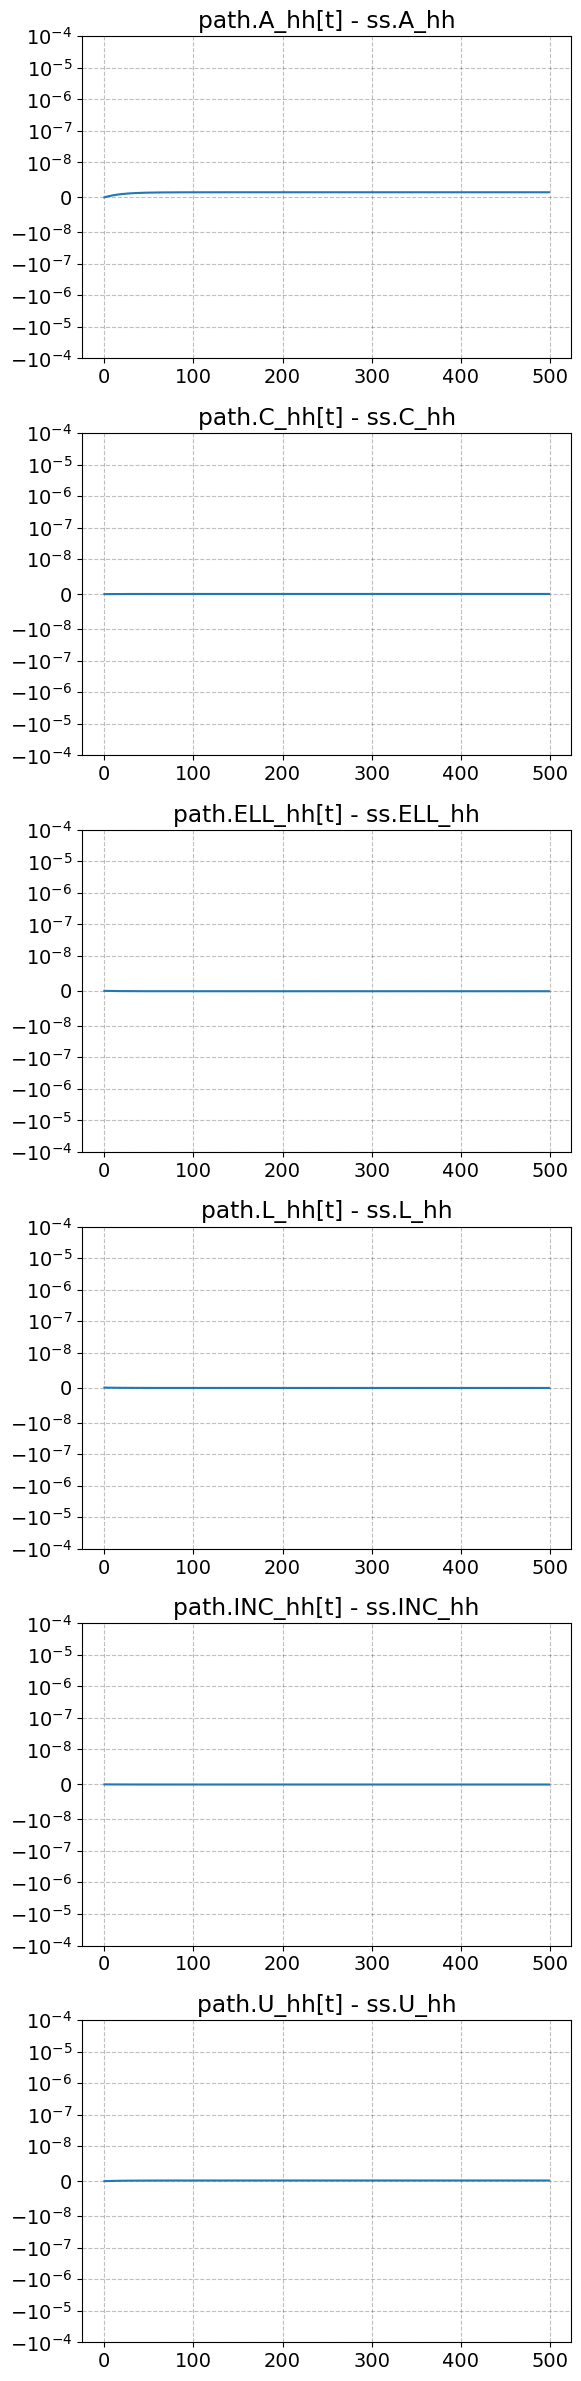

In [797]:
model.test_hh_path()

## 3. <a id='toc3_'></a>[Test 2: Evaluating the objective for finding the steady state](#toc0_)

We can try out various inputs and look at the outputs:

In [798]:
for KL in [2.0,3.0,4.0]:
    clearing_A = obj_ss(KL,model,do_print=False)
    print(f'{KL = :.2f} -> {clearing_A = :12.8f}')

c:\Users\PerLi\OneDrive\Skole\Økonomi\7. sem\HetA\AdvMacroHet\Assignments\Assignment_II\household_problem.py:71: RuntimeWarning: divide by zero encountered in scalar power
  print(S[i_fix]**(1-par.omega)/(1-par.omega))
c:\Users\PerLi\OneDrive\Skole\Økonomi\7. sem\HetA\AdvMacroHet\Assignments\Assignment_II\household_problem.py:72: RuntimeWarning: divide by zero encountered in scalar power
  u[i_fix,:,:] = c[i_fix]**(1-par.sigma)/(1-par.sigma) - par.varphi*ell[i_fix]**(1+par.nu)/(1+par.nu)


-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


AssertionError: invalid values in ss.u

## 4. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

In [729]:
par.G_ss = 0.1
par.L_G_ss = 0.1
par.chi_ss = 0.1

model.find_ss(do_print=True)

seaching in [2.9308,4.7940]
steady state found in 19.7 secs
ss.tau =  0.199
ss.K =  3.222
ss.B =  0.000
ss.A_hh =  3.222
ss.L_Y =  0.888
ss.L_G =  0.100
ss.G =  0.100
ss.Y =  1.307
ss.r =  0.022
ss.w =  1.030
ss.chi =  0.000
ss.clearing_A = -2.22e-07
ss.clearing_L = 0.00e+00
ss.clearing_Y = 1.00e-01


## 5. <a id='toc5_'></a>[Grid search](#toc0_)

In [631]:
KL_min = ((1/par.beta+par.delta-1)/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))
KL_max = (par.delta/(par.alpha*par.Gamma_Y))**(1/(par.alpha-1))

In [632]:
NKL = 10
KL_vec = np.hstack((np.linspace(KL_min+1e-2,KL_max-1e-2,NKL),np.linspace(KL_max+1e-2,10.0,NKL)))
clearing_A_vec = np.nan*np.ones(KL_vec.size)
r_vec = np.nan*np.ones(KL_vec.size)

model_ = model.copy()
for i,KL in enumerate(KL_vec):
    print(f'{KL = :6.2f}: ',end='')
    try:
        clearing_A_vec[i] = obj_ss(KL,model_,do_print=False)
        r_vec[i] = model_.ss.r
        print(f'clearing_A = {clearing_A_vec[i]:16.8f}')
    except Exception as e:
        print(e)

KL =   2.93: clearing_A =     -59.86664559
KL =   3.14: clearing_A =     -11.83691429
KL =   3.34: clearing_A =      -4.57001149
KL =   3.55: clearing_A =      -1.18556812
KL =   3.76: clearing_A =       0.66879032
KL =   3.97: clearing_A =       1.81101426
KL =   4.17: clearing_A =       2.58488694
KL =   4.38: clearing_A =       3.15074448
KL =   4.59: clearing_A =       3.58863380
KL =   4.79: clearing_A =       3.94535876
KL =   4.81: clearing_A =       3.97668840
KL =   5.39: clearing_A =       4.72186469
KL =   5.97: clearing_A =       5.30985633
KL =   6.54: clearing_A =       5.83677263
KL =   7.12: clearing_A =       6.33266294
KL =   7.70: clearing_A =       6.81079507
KL =   8.27: clearing_A =       7.27730418
KL =   8.85: clearing_A =       7.73719859
KL =   9.42: clearing_A =       8.19257046
KL =  10.00: clearing_A =       8.64419030


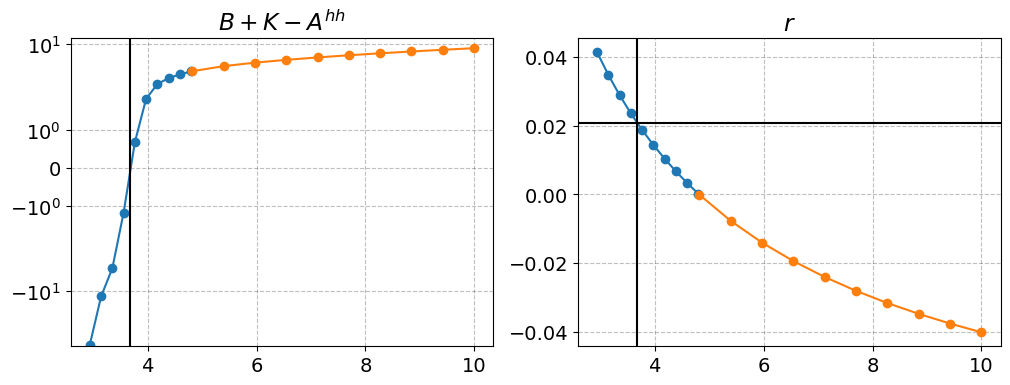

In [633]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('$B+K-A^{hh}$')
ax.plot(KL_vec[:NKL],clearing_A_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],clearing_A_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L_Y,color='black')
ax.set_yscale('symlog')

ax = fig.add_subplot(1,2,2)
ax.set_title('$r$')
ax.plot(KL_vec[:NKL],r_vec[:NKL],'-o')
ax.plot(KL_vec[NKL:],r_vec[NKL:],'-o')
ax.axvline(ss.K/ss.L_Y,color='black');
ax.axhline(ss.r,color='black');

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

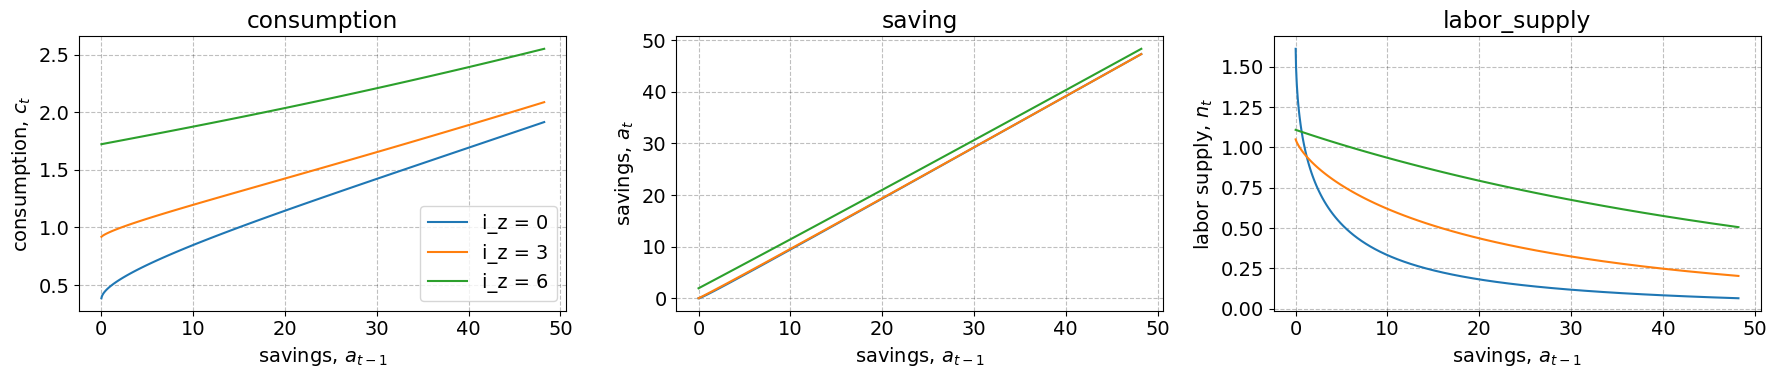

In [634]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()

## 7. <a id='toc7_'></a>[Simulation](#toc0_)

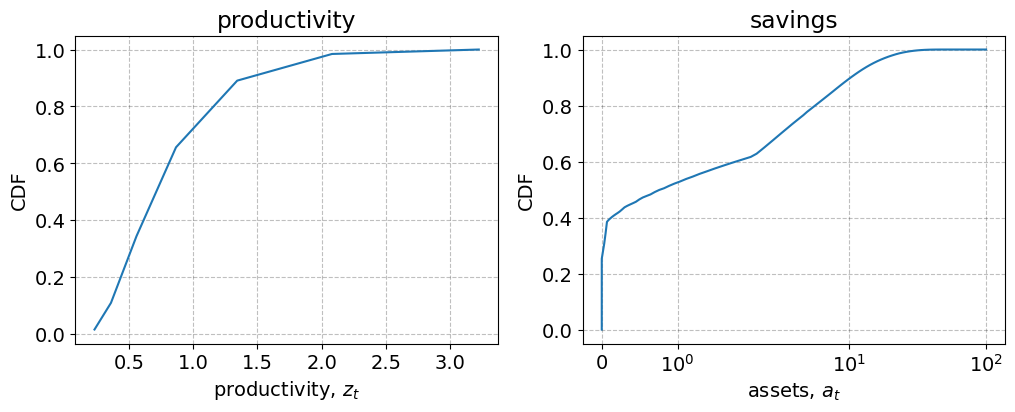

In [635]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D,axis=(0,2)))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

## 8. <a id='toc8_'></a>[Test transition path](#toc0_)

In [636]:
try:
    model.test_ss()
except Exception as e:
    print('you need to update GEModelTools to call this function (optional)')

K              :       3.3797
L_Y            :       0.9206
rK             :       0.1207
w              :       1.0341
Y              :       1.3599
A              :       3.3797
r              :       0.0207
B              :      -0.0000
G              :       0.0050
L_G            :       0.0050
S              :       0.0050
chi            :       0.0000
tau            :       0.0106
wt             :       1.0231
A_hh           :       3.3797
C_hh           :       1.0169
ELL_hh         :       0.9930
L_hh           :       0.9256
INC_hh         :       1.0169
U_hh           :      -1.6292
I              :       0.3380
clearing_A     :       0.0000
clearing_L     :       0.0000
clearing_Y     :       0.0050


note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.7 secs
household problem simulated along transition in 0.1 secs



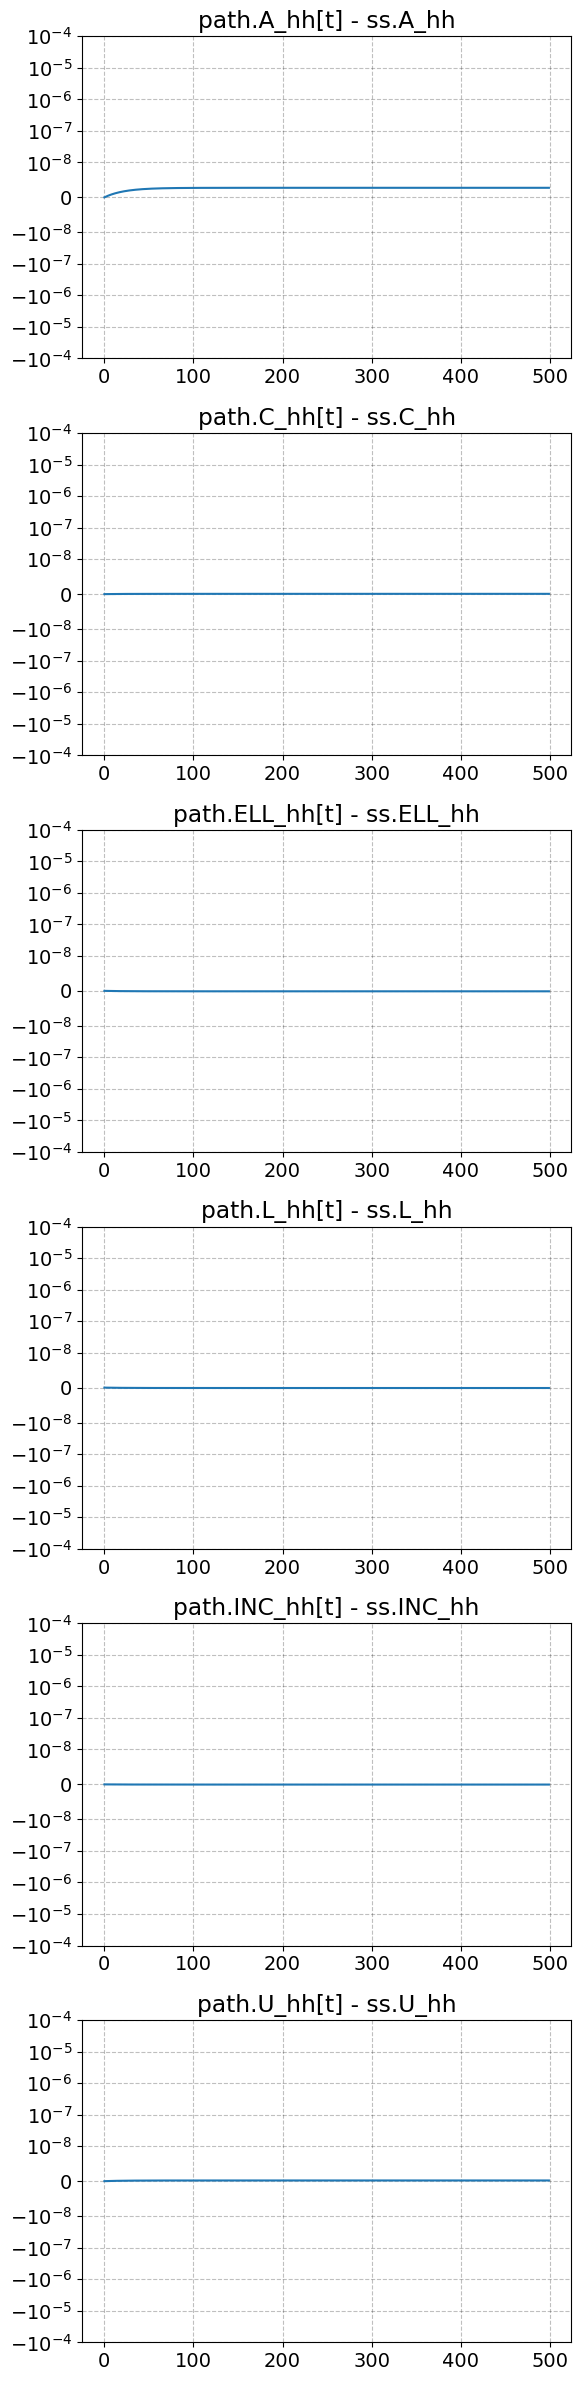

In [637]:
model.test_hh_path()

In [638]:
model.test_path()

shocks: G L_G chi 
unknowns: K L_Y S tau 

blocks.production_firm
 rK               0.0e+00
 w                0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                8.9e-16
 r                0.0e+00
blocks.government
 B                0.0e+00
 wt               0.0e+00
hh
 A_hh             2.7e-09
 C_hh             7.8e-11
 ELL_hh           1.3e-10
 L_hh             1.1e-10
 INC_hh           4.9e-11
 U_hh             1.9e-10
blocks.market_clearing
 I                2.8e-16
 clearing_A       2.7e-09 [target]
 clearing_L       1.1e-10 [target]
 clearing_Y       7.8e-11


## 9. <a id='toc9_'></a>[Find transition path](#toc0_)

In [639]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 0.9 secs
curly_Y and curly_D calculated for wt              in 0.9 secs
curly_E calculated in 0.5 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 2.5 secs

full Jacobians:
full Jacobian to unknowns computed in 0.7 secs [in evaluate_blocks(): 0.3 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_blocks(): 0.2 secs]


In [640]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.72e-09
   2.72e-09 in clearing_A
   1.06e-10 in clearing_L


LinAlgError: Last 2 dimensions of the array must be square